# 6.2 ESA Task 6.2 Exploring relationships - Germany

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Combine dataframe subsets for EDA

### 04. EDA (Exploratory Data Analysis)

>#### 04.01 Correlation matrix heatmaps

>>##### Germany

>#### 04.02 Scatterplots

>>##### Germany

>#### 04.03 Pair Plots

>>##### Germany

>#### 04.04 Categorical Plots

>>##### Germany

>>>##### Scatterplots & stacked bar histograms with categorical exogenous shock variable overlay

### 01. Import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import os

# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

# Import seven (7) country-level subset datasets

ctry_us = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
ctry_germany = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'germany_pre_stat.pkl'))
ctry_japan = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'japan_pre_stat.pkl'))
ctry_south_korea = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'south_korea_pre_stat.pkl'))
ctry_australia = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
ctry_norway = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
ctry_switzerland = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'switzerland_pre_stat.pkl'))

### 02. Verify dataset import results

In [30]:
ctry_germany.shape

(243, 31)

In [32]:
ctry_germany.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2184,Germany,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.052922,-0.0098,-0.0123,0.0031,0.167592,0.022727,0.01661,0.0,0.089612,-0.005643
2185,Germany,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.031749,-0.0118,-0.0140,0.0008,0.214026,0.022632,0.01661,0.0,0.058841,-0.005643
2186,Germany,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.000000,-0.0137,-0.0148,0.0039,0.199351,0.021676,0.01661,0.0,0.058841,-0.005643


### 03. Combine dataframe subsets for EDA

#### Germany

In [164]:
# Check for candidate target columns from ctry_germany
ctry_germany.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [168]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_germany[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'eur_usd_logret12','eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',\
                'eur_gbp_logret12', 'eur_jpy_logret12']]

In [170]:
df1.shape

(243, 16)

In [172]:
df2.shape

(243, 8)

In [174]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_germany_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [176]:
ctry_germany_merge.shape

(243, 23)

In [178]:
ctry_germany_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
240,Germany,2025-01-01,False,False,False,True,True,-0.0098,-0.0123,0.0031,...,0.0,0.089612,-0.005643,0.224487,-0.046957,0.012121,0.020340,0.000000,-0.023530,0.017037
241,Germany,2025-02-01,False,False,False,True,True,-0.0118,-0.0140,0.0008,...,0.0,0.058841,-0.005643,0.193819,-0.037740,0.000000,0.020340,-0.010582,-0.023811,-0.021275
242,Germany,2025-03-01,False,False,False,True,True,-0.0137,-0.0148,0.0039,...,0.0,0.058841,-0.005643,0.459799,-0.009217,0.035507,0.052993,-0.010363,-0.023530,-0.010866


In [180]:
ctry_germany_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
0,Germany,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Germany,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Germany,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Germany,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Germany,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Germany,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Germany,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_germany_merge.drop(index=range(12), inplace=True)

In [184]:
ctry_germany_merge.shape

(231, 23)

In [186]:
ctry_germany_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
12,Germany,2006-01-01,False,False,False,False,False,0.0025,0.0036,-0.0024,...,0.038259,-0.009390,-0.001127,-0.110001,-0.094559,-0.071459,-0.139762,0.000000,-0.028573,0.030158
13,Germany,2006-02-01,False,False,False,False,False,0.0029,0.0046,-0.0007,...,0.038259,-0.037388,-0.001127,0.062883,-0.088411,-0.030583,-0.161423,0.006431,-0.014599,0.031939
14,Germany,2006-03-01,False,False,False,False,False,0.0046,0.0058,-0.0006,...,0.038259,-0.037388,-0.001127,-0.116166,-0.095310,-0.018019,-0.146930,0.012821,0.000000,0.014661


In [188]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_germany_merge.reset_index(drop=True, inplace=True)

In [190]:
# Check the first 3 rows
ctry_germany_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
0,Germany,2006-01-01,False,False,False,False,False,0.0025,0.0036,-0.0024,...,0.038259,-0.009390,-0.001127,-0.110001,-0.094559,-0.071459,-0.139762,0.000000,-0.028573,0.030158
1,Germany,2006-02-01,False,False,False,False,False,0.0029,0.0046,-0.0007,...,0.038259,-0.037388,-0.001127,0.062883,-0.088411,-0.030583,-0.161423,0.006431,-0.014599,0.031939
2,Germany,2006-03-01,False,False,False,False,False,0.0046,0.0058,-0.0006,...,0.038259,-0.037388,-0.001127,-0.116166,-0.095310,-0.018019,-0.146930,0.012821,0.000000,0.014661


In [192]:
# Check the last 3 rows
ctry_germany_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
228,Germany,2025-01-01,False,False,False,True,True,-0.0098,-0.0123,0.0031,...,0.0,0.089612,-0.005643,0.224487,-0.046957,0.012121,0.020340,0.000000,-0.023530,0.017037
229,Germany,2025-02-01,False,False,False,True,True,-0.0118,-0.0140,0.0008,...,0.0,0.058841,-0.005643,0.193819,-0.037740,0.000000,0.020340,-0.010582,-0.023811,-0.021275
230,Germany,2025-03-01,False,False,False,True,True,-0.0137,-0.0148,0.0039,...,0.0,0.058841,-0.005643,0.459799,-0.009217,0.035507,0.052993,-0.010363,-0.023530,-0.010866


In [194]:
# Export the country = Germany subset merged dataframe as backup, before conducting EDA
ctry_germany_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_germany_merge.pkl'))

### 04. EDA (Exploratory Data Analysis)

#### 04.01 Correlation matrix heatmaps

#### Germany

In [494]:
# Create a subset dataframe first to include only those variables of interest
sub_germany = ctry_germany_merge[['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
                     'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'vix_avg_logret12',\
                     'eur_usd_logret12', 'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12']]

In [500]:
# Check the top 3 rows
sub_germany.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
0,0.0025,0.0036,-0.0024,0.243351,0.018360,0.052992,0.038259,-0.009390,-0.001127,-0.110001,-0.094559,-0.071459,-0.139762,0.000000,-0.028573,0.030158
1,0.0029,0.0046,-0.0007,0.272293,0.018396,0.052992,0.038259,-0.037388,-0.001127,0.062883,-0.088411,-0.030583,-0.161423,0.006431,-0.014599,0.031939
2,0.0046,0.0058,-0.0006,0.289559,0.013968,0.052992,0.038259,-0.037388,-0.001127,-0.116166,-0.095310,-0.018019,-0.146930,0.012821,0.000000,0.014661


In [502]:
# Check the bottom 3 rows
sub_germany.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
228,-0.0098,-0.0123,0.0031,0.167592,0.022727,0.01661,0.0,0.089612,-0.005643,0.224487,-0.046957,0.012121,0.020340,0.000000,-0.023530,0.017037
229,-0.0118,-0.0140,0.0008,0.214026,0.022632,0.01661,0.0,0.058841,-0.005643,0.193819,-0.037740,0.000000,0.020340,-0.010582,-0.023811,-0.021275
230,-0.0137,-0.0148,0.0039,0.199351,0.021676,0.01661,0.0,0.058841,-0.005643,0.459799,-0.009217,0.035507,0.052993,-0.010363,-0.023530,-0.010866


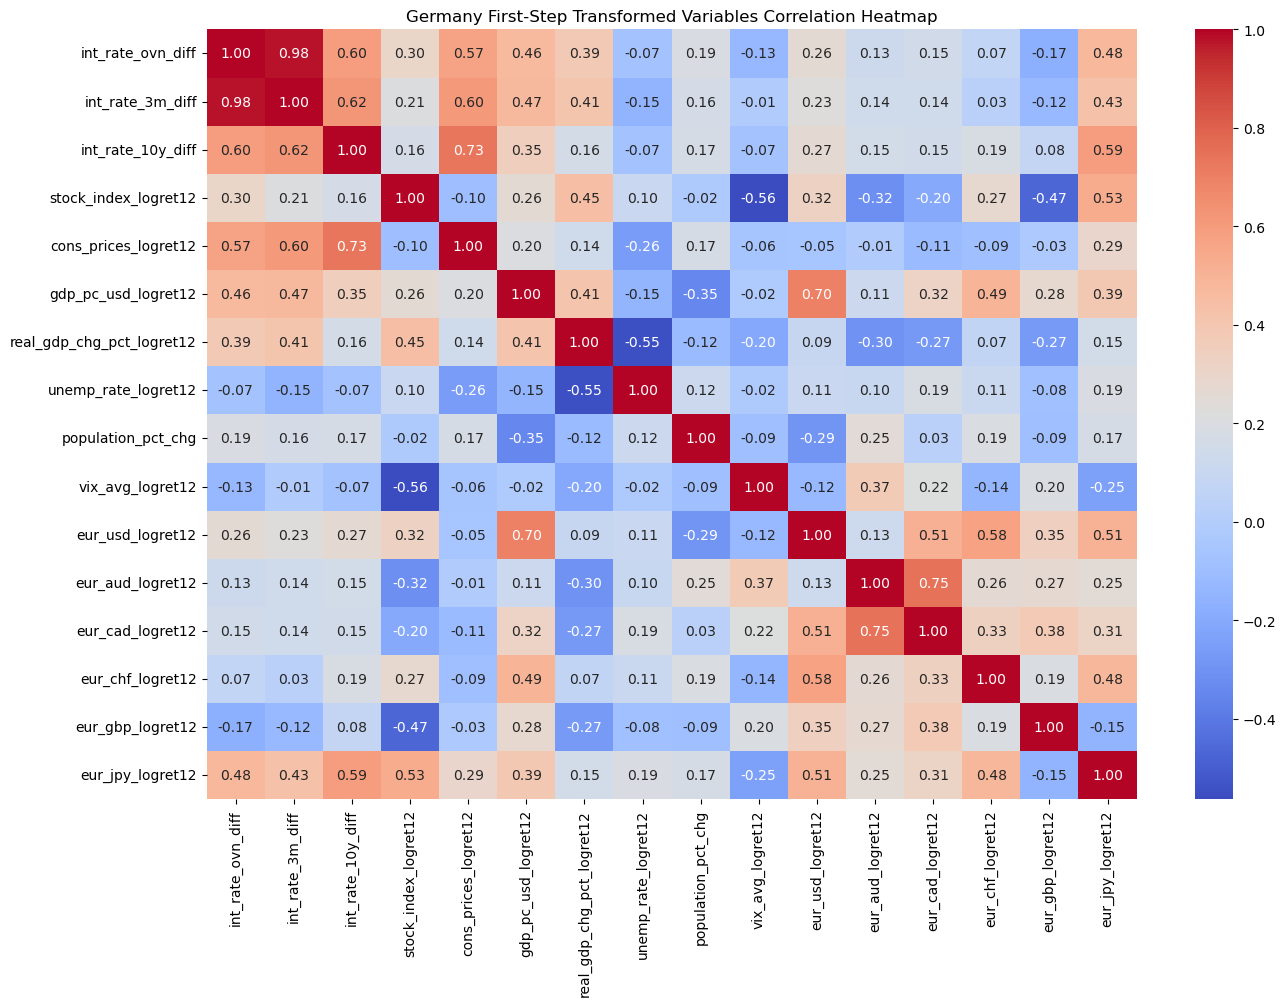

In [504]:
# Generate a correlation matrix heatmap for the first-step transformed variables in the sub_germany dataframe

plt.figure(figsize=(15, 10))
sns.heatmap(sub_germany.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Germany First-Step Transformed Variables Correlation Heatmap")
plt.show()

##### This correlation heatmap examines variables before necessary stationarization and z-score standardization (normalization, rescaling), which will come later.  Accordingly, there will likely be some spurious correlations within the matrix at this EDA stage.  The correlations measured are between mostly log return (12 months) first-step transformed variables, and to a lesser extent with a few first difference of % variables.

#### Preliminary Interpretation

##### This will merely highlight divergences with the US correlation heatmap results or interesting relationships.

##### The interest rate variables (overnight, 3-month and 10-year time periods) have even stronger positive correlations (especially the 10-year interest rate's +0.73 correlation coefficient) with the inflation rate than the equivalent US interest rates do.  Deutsche Bundesbank is apparently more responsive and hawkish toward inflation than the US Federal Reserve is.

##### While shorter-term interest rate variables (overnight, 3-month) revealed a similar moderate positive correlation with the GDP measures, the 10-year interest rate diverged by showing a low correlation with these measures, compared to the relationships in the US market.

##### Interest rate variables diverged with the US experience in showing a low negative correlation with the unemployment rate.  A bit surprising.

##### Similar to the US cross-currency USDJPY pair, interest rate variables showed moderately-strong positive correlations for EURJPY (Euro versus Japanese Yen) only.

##### The primary stock market index log returns had moderate positive correlation with Real GDP (but not GDP per capita in USD), very low correlation with the unemployment rate (unlike the US experience), moderate-strong negative correlation with the VIX (similar to the US, and perhaps surprising because the VIX is skewed toward the US market), moderate negative correlation with EURGBP but moderate-strong positive correlations with EURJPY.

##### Inflation revealed a low correlation with population-normalized nominal GDP, unexpectedly diverging from the US experience.

##### Real GDP revealed a moderate-strong negative correlation with the unemployment rate, in contrast to the US which saw a stronger negative relationship.  Meanwhile, GDP per capita in USD showed little correlation with the unemployment rate, perhaps because the former metric is USD rather than EUR-denominated.

##### GDP per capita in USD revealed a strong positive correlation (+0.70) with EURUSD, not surprising, and a moderate positive correlation (+0.49) with EURCHF (Euro cross-rate with the Swiss Franc).

### 04.02 Scatterplots

### Comment: All scatterplots here are of first-step transformed variables as log returns (annual) or first difference %'s. For brevity the short form of the variable name is used in plot labels and descriptive commentary.

### Note: Both versions of the GDP measure change data values annually rather than monthly, while all other variables (except population) change data values monthly, thus the scatterplots that include either GDP measure will have straight lines of dots representing this difference in measurement periodicity.

#### Germany

In [697]:
# Check variables for candidate scatterplots based on the prior correlation heatmap results
sub_germany.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'eur_usd_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12'],
      dtype='object')

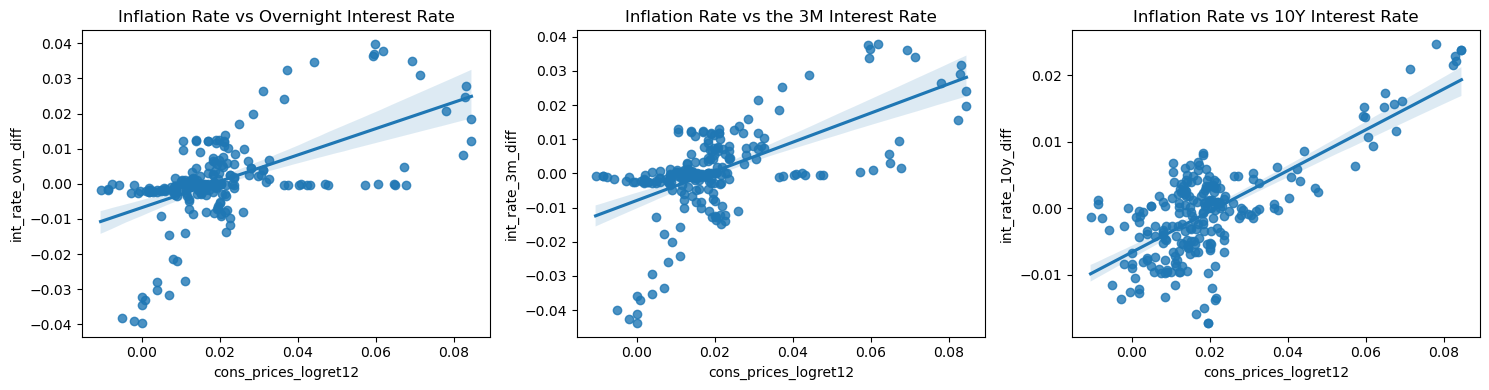

In [706]:
# Scatterplots for inflation rate against the three (3) interest rate variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='cons_prices_logret12', y='int_rate_ovn_diff', data=sub_germany, ax=axes[0])
axes[0].set_title('Inflation Rate vs Overnight Interest Rate')
sns.regplot(x='cons_prices_logret12', y='int_rate_3m_diff', data=sub_germany, ax=axes[1])
axes[1].set_title('Inflation Rate vs the 3M Interest Rate')
sns.regplot(x='cons_prices_logret12', y='int_rate_10y_diff', data=sub_germany, ax=axes[2])
axes[2].set_title('Inflation Rate vs 10Y Interest Rate')
plt.tight_layout()
plt.show()

### While the three varying-maturity interest rates of the Deutsche Bundesbank show a moderate positive correlation with the inflation rate in Germany, the 10-year interest rate shows a better-fitting linear regression line.

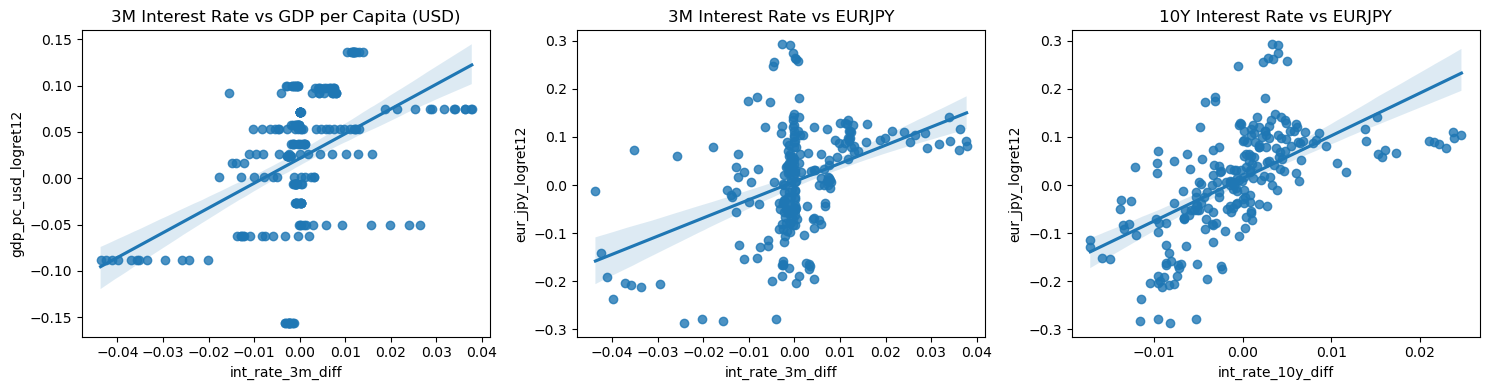

In [709]:
# More interest rate scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='int_rate_3m_diff', y='gdp_pc_usd_logret12', data=sub_germany, ax=axes[0])
axes[0].set_title('3M Interest Rate vs GDP per Capita (USD)')
sns.regplot(x='int_rate_3m_diff', y='eur_jpy_logret12', data=sub_germany, ax=axes[1])
axes[1].set_title('3M Interest Rate vs EURJPY')
sns.regplot(x='int_rate_10y_diff', y='eur_jpy_logret12', data=sub_germany, ax=axes[2])
axes[2].set_title('10Y Interest Rate vs EURJPY')
plt.tight_layout()
plt.show()

### While interest rates show positive correlations with other measures, the 10-year interest rate (far right scatterplot) again shows a better-fitting linear regression line, although not by much.

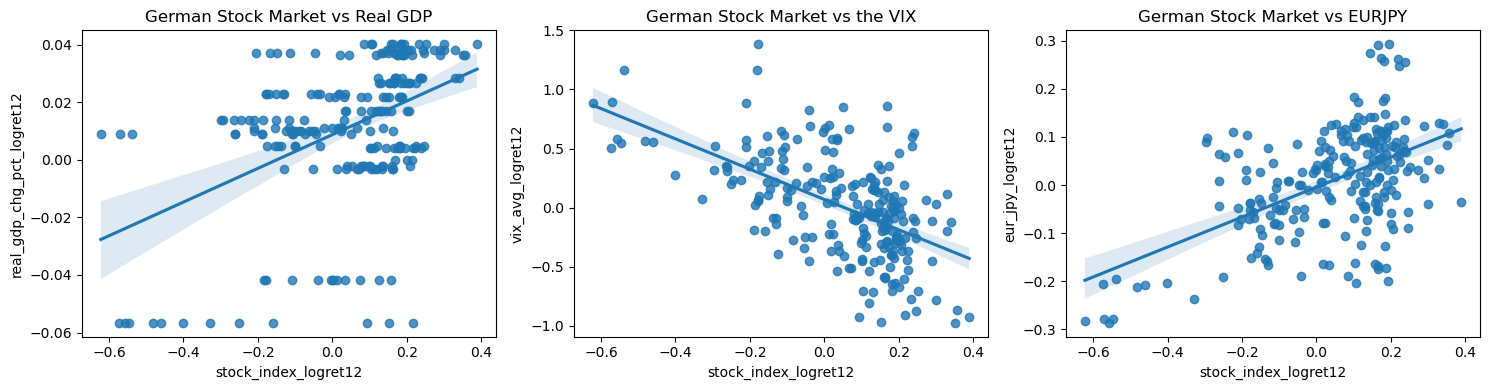

In [722]:
# Stock market scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='stock_index_logret12', y='real_gdp_chg_pct_logret12', data=sub_germany, ax=axes[0])
axes[0].set_title('German Stock Market vs Real GDP')
sns.regplot(x='stock_index_logret12', y='vix_avg_logret12', data=sub_germany, ax=axes[1])
axes[1].set_title('German Stock Market vs the VIX')
sns.regplot(x='stock_index_logret12', y='eur_jpy_logret12', data=sub_germany, ax=axes[2])
axes[2].set_title('German Stock Market vs EURJPY')
plt.tight_layout()
plt.show()

### Difficult to ascertain any relationship between the two variables in the left scatterplot based on the overall "shape" of the data, but the middle and right-hand plots show negative and positive correlations, respectively.  The relevant variables would likely benefit from stationarization and z-score method standardization (normalization, rescaling) to improve regression line fit.

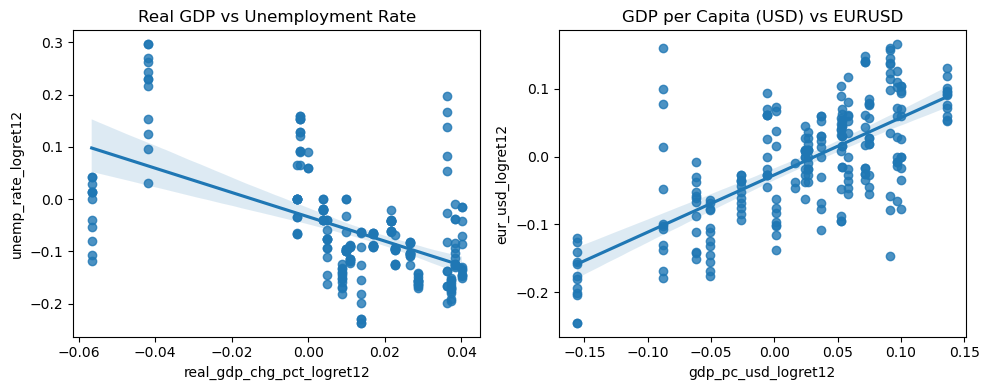

In [725]:
# Two more for the alternate measures of GDP
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.regplot(x='real_gdp_chg_pct_logret12', y='unemp_rate_logret12', data=sub_germany, ax=axes[0])
axes[0].set_title('Real GDP vs Unemployment Rate')
sns.regplot(x='gdp_pc_usd_logret12', y='eur_usd_logret12', data=sub_germany, ax=axes[1])
axes[1].set_title('GDP per Capita (USD) vs EURUSD')
plt.tight_layout()
plt.show()

### Negative (left), positive (right) correlations between the chosen variables.

### 04.03 Pair Plots

#### Germany

In [882]:
# Check variables for candidate pair plots based on prior scatterplots
sub_germany.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'eur_usd_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12'],
      dtype='object')

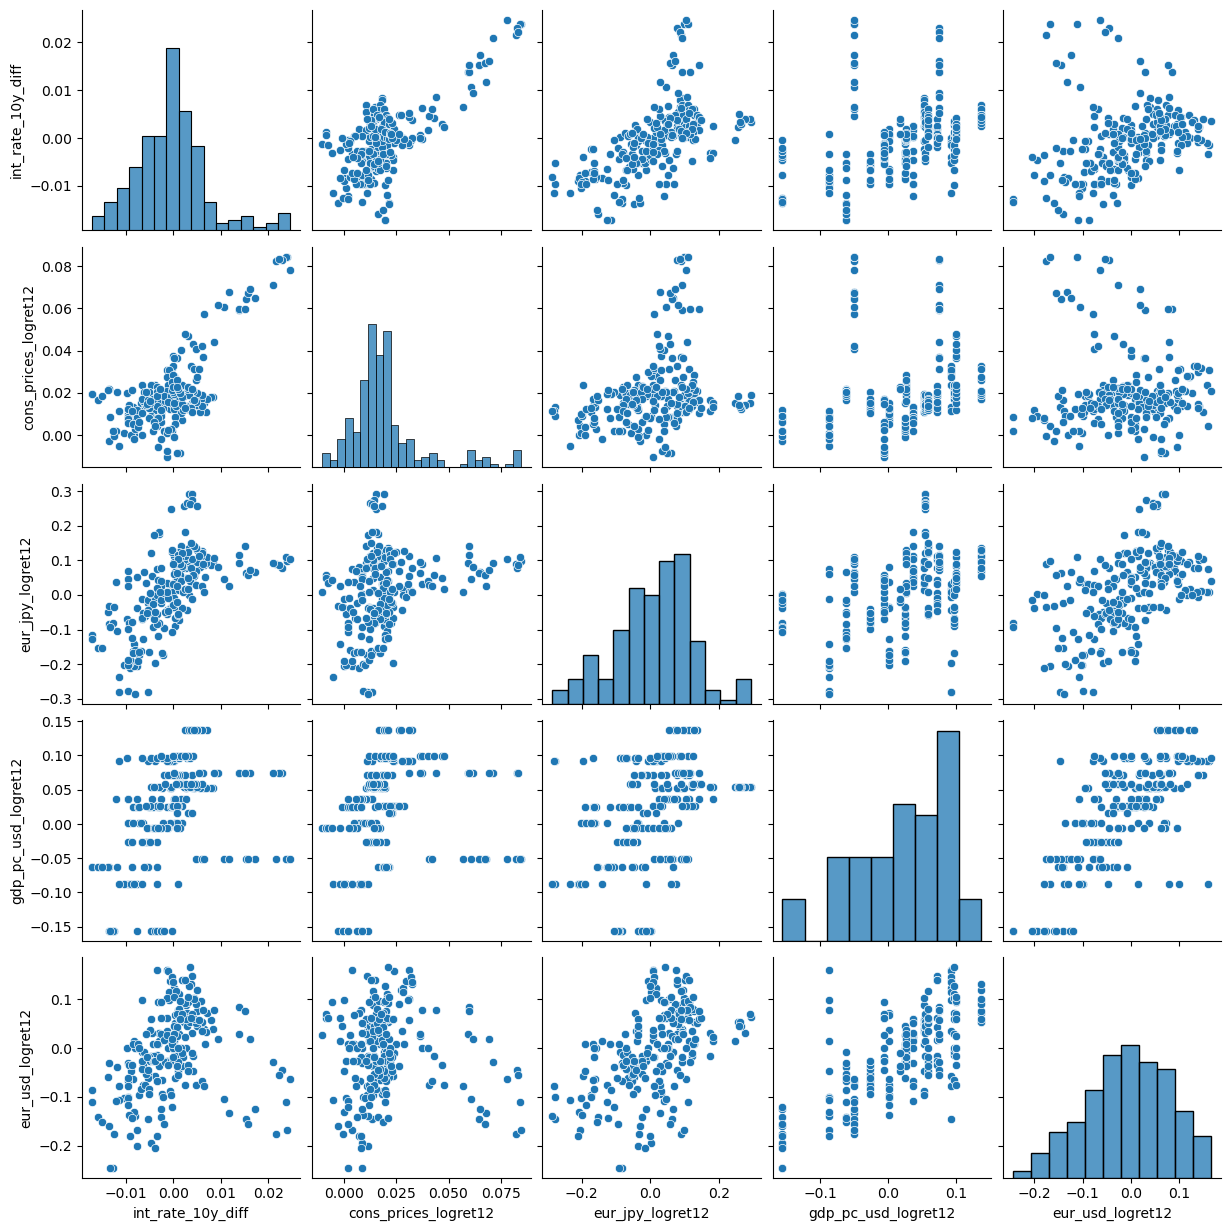

In [886]:
# Create a pair plot matrix
sub_germany_1 = sub_germany[['int_rate_10y_diff', 'cons_prices_logret12', 'eur_jpy_logret12', 'gdp_pc_usd_logret12', 'eur_usd_logret12']]
p_germany_1 = sns.pairplot(sub_germany_1)

#### The five variables approximate Normal frequency distributions on the left half up to the peak, but on the right half the shape is asymmetrical with the left half, right-skewed in some cases ('int_rate_10y', 'cons_prices') or truncated in another ('eur_usd', 'gdp_pc_usd', 'eur_jpy'). Further exploration: (1) 10Y interest rate vs inflation, as Deutsche Bundesbank policy uses interest rates to mitigate inflation, and the scatterplot shows a clear positive correlation between the two variables; (2) 10Y interest rate vs EURJPY, to understand impact if any on "carry trade" currencies, and the scatterplot reveals a positive correlation; and (3) GDP per Capita vs EURUSD, to assess strength of relationship between these variables as the scatterplot suggests a positive correlation, and to start comparing instances where one of the two GDP measures impacts another variable but the other GDP measure does not.  The 'GDP per Capita (USD)' variable measures population-normalized GDP expressed in USD but does not adjust for inflation, while the 'Real GDP' variable measures inflation-adjusted GDP in local currency, but does not adjust for population.  The two measures of GDP are very different, but nonetheless useful for different analytical goals.

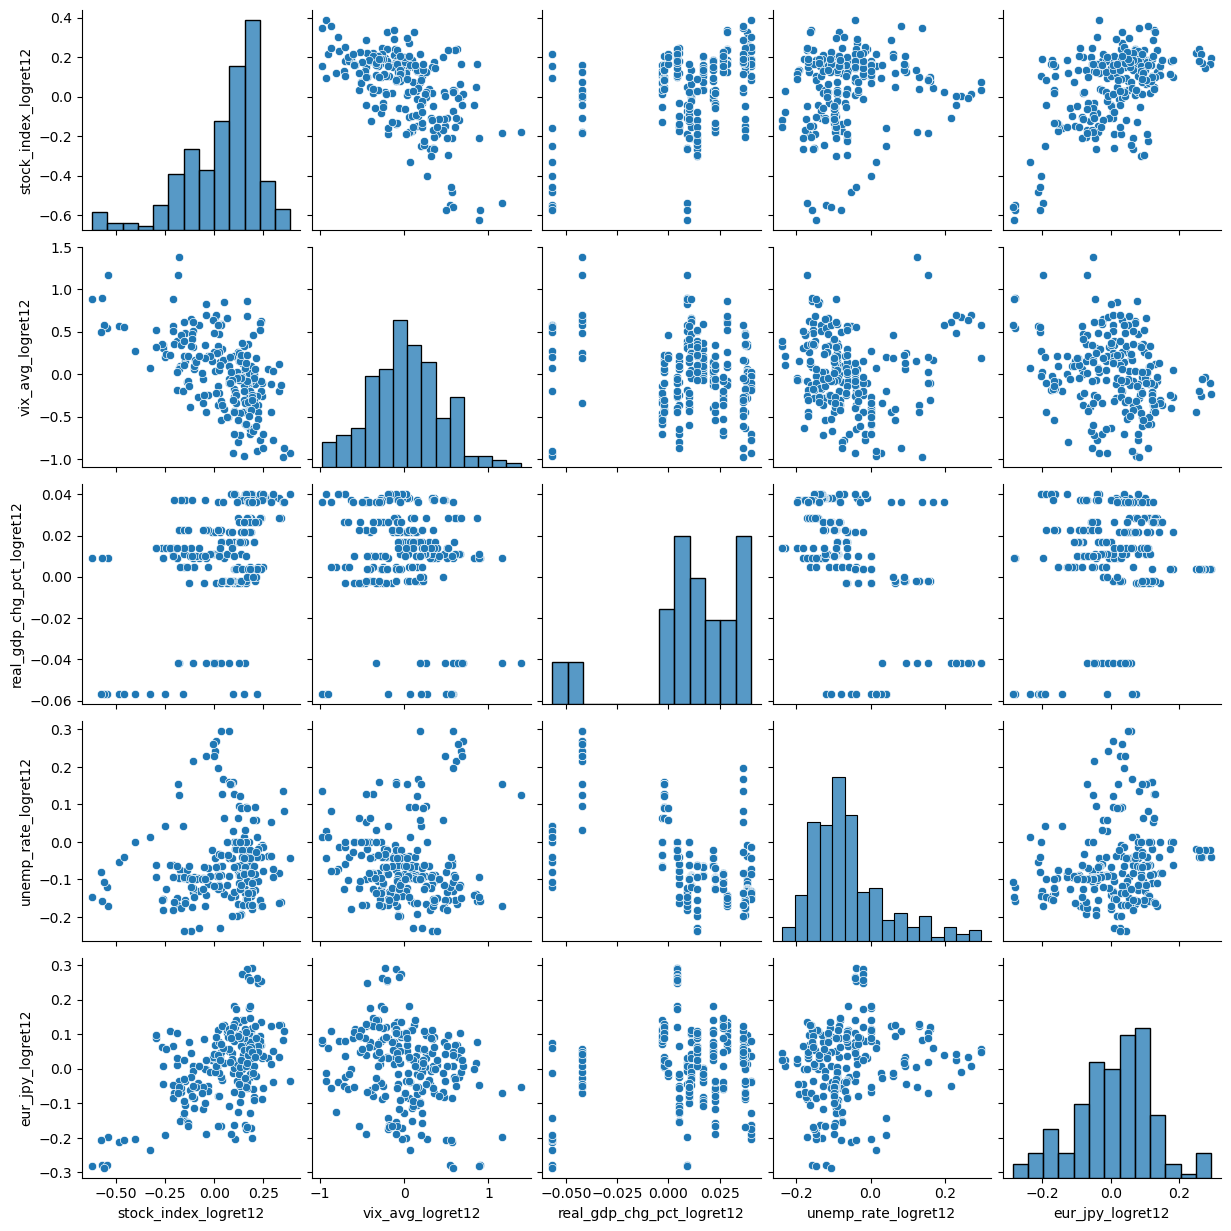

In [890]:
# Create another pair plot matrix
sub_germany_2 = sub_germany[['stock_index_logret12', 'vix_avg_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'eur_jpy_logret12']]
p_germany_2 = sns.pairplot(sub_germany_2)

#### The 'eur_jpy', 'stock_index' and 'vix_avg' variables try to approximate Normal frequency distributions, but are not quite symmetrical on the right side, the 'unemp_rate' variable frequency distribution is right-skewed, while the 'real_gdp_chg_pct' variable has an unusual shape with a large gap between bins on the left side.  Further exploration: (1) stock market vs VIX to see how a US equities market fear gauge (the VIX) impacts a non-US stock market (Germany, in this case), and because the scatterplot suggests an inverse (negative) correlation as per the US experience; (2) stock market vs Real GDP, as these are key macroeconomic variables, and the scatterplot a moderately positive correlation, despite some outliers that are likely exogenous-shock related; (3) stock market vs EURJPY, because the scatterplot shows a positive correlation yet it is not immediately apparent how the two variables might be connected (Japan and Germany are not major trading partners), unless there is a hidden, indirect "carry trade"-related dynamic; and (4) Real GDP vs unemployment rate, as these are major economic variables, and the scatterplot confirms an expected negative correlation but shows outliers at both extremes, which might have been caused by exogenous economic shocks.

### 04.04 Categorical Plots

#### Disclosure: I engaged ChatGPT to create and name two custom-defined functions below -- namely, shockstack_grid and shockstack_kdegrid_v2 -- for some of the plot matrices in this section. This helped expedite further visualization of dozens of variables, conserve space and time, optimize formatting and legends and right-size grids with varying quantities of sub-plots.

#### The subset dataframes created for EDA correlation heatmaps and pair plots omitted the time variable but were all organized exactly the same way chronologically (and the year 2005 row data was omitted as all the first-step transformed variables as annual log returns, etc. had NaN values that year because monthly data began with Jan 2005), and consisted entirely of numerical variables (no categorical variables). Since these next visualizations target the addition of a categorical dimension, it makes sense now to add a column to the subset dataframes of interest that specifies which -- if any -- exogenous economic shock or shocks existed for the data values in each row (where each row corresponds to a month/year point in time). During normal times, when there were no shock(s) occurring, the categorical data value "No Shock" will be applied.  The goal of the categorical plots is to visually zero in on outlier x,y data points in the scatterplots to see which shock(s), if any, caused some or most of the extreme fluctuations.

#### First it's helpful to create an exogenous economic shock-specific subset dataframe, with a derived column 'shock_name' to name the shock(s) if any that existed at each point in time.

#### Begin by examining the fx_vix_comm_sub_copy subset dataframe on dimensions, content and column names, from which we will extract the shock-related columns to create another subset dataframe.

In [987]:
fx_vix_comm_sub_copy.shape

(231, 38)

In [991]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [993]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [995]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12'],
      dtype='object')

#### Create an exogenous economic shocks-specific subset dataframe, and then verify dimensions and content

In [1013]:
exo_shk_flags = fx_vix_comm_sub_copy[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag']]

In [1015]:
exo_shk_flags.shape

(231, 6)

In [1017]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
0,2006-01-01,False,False,False,False,False
1,2006-02-01,False,False,False,False,False
2,2006-03-01,False,False,False,False,False


In [1019]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
228,2025-01-01,False,False,False,True,True
229,2025-02-01,False,False,False,True,True
230,2025-03-01,False,False,False,True,True


#### Create and add a derived column 'shock_name' and applicable shock name categorical data values to the subset dataframe

In [1021]:
exo_shk_flags_copy = exo_shk_flags.copy()

In [1025]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['gfc_flag'] == True, 'shock_name'] = 'GFC'

In [1031]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['cpc_flag'] == True, 'shock_name'] = 'CPC'

In [1033]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False), 'shock_name'] = 'Cov-19'

In [1035]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & \
                       (exo_shk_flags_copy['rus_ukr_war_flag'] == True), 'shock_name'] = 'Cov-19 & Rus_Ukr_War'

In [1037]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'Rus_Ukr_War'

In [1039]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == True), 'shock_name'] = 'Rus_Ukr_War & BOJ Pivot'

In [1045]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['gfc_flag'] == False) & (exo_shk_flags_copy['cpc_flag'] == False) & \
                       (exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False) & \
                       (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'No Shock'

#### Check the modified dataframe dimensions and content to verify that the 'shock_name' column derivation took place as intended

In [1047]:
exo_shk_flags_copy.shape

(231, 7)

In [1049]:
exo_shk_flags_copy['shock_name'].value_counts(dropna = False)

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

### Interesting result. The counts above (which count the number of months, since the data are monthly) tell us: normal economic conditions ("No Shock" periods) comprised only 57% (132/231) of the 19-year plus 3-month temporal range.  Conversely, shocks big (Great Financial Crisis, Covid-19) and small (2014 Commodity Price Collapse, still-ongoing Russia-Ukraine War and the still-ongoing 2024 Bank of Japan Interest Rate Pivot) in total comprised 43% of that temporal range.  We lurch from crisis to crisis, shock to shock.  Hence, this independent study project has the goal of understanding different types of past or current exogenous economic shocks' impact on some countries and asset classes, to help model potential outcomes for these variables based on the new shock that rolled out in April 2025, e.g. US tariff policy changes.

In [1051]:
exo_shk_flags_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [1053]:
exo_shk_flags_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [1055]:
# Export the exogenous shock-specific subset dataframe as backup, as it may prove useful later
exo_shk_flags_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'exo_shk_flags_copy.pkl'))

#### Define a custom function to create a grid of histograms for selected variables, with a categorical variable overlay.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def shockstack_grid(df, vars_to_plot, hue='shock_name', bins=20, cols=3, figsize_per_plot=(6, 5),
                     save=False, filename=None, filetype='png', output_dir='.'):
    """
    Plots a grid of color-stacked histograms for selected variables using the 'hue' column (default: 'shock_name').

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        vars_to_plot (list of str): List of up to 9 numeric variable names to include.
        hue (str): Column name to use for stacked colors (e.g., 'shock_name').
        bins (int): Number of bins for histogram.
        cols (int): Number of columns in the subplot grid (2 or 3 recommended).
        figsize_per_plot (tuple): Size per subplot (width, height).
        save (bool): If True, saves to disk.
        filename (str): If "save" chosen, specify the filename for the output.
        filetype (str) : If "save" chosen, optional other formats include 'pdf', otherwise defaults to 'png'.
        output_dir (str): Path where figures are saved.
    """
    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0] * cols, figsize_per_plot[1] * rows), constrained_layout=True)
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    # Define color palette
    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))
    color_dict = dict(zip(categories, palette))
    
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        # Drop NA rows for variable and hue
        sub_df = df[[var, hue]].dropna()

        # Create binned intervals
        bin_counts = pd.cut(sub_df[var], bins=bins)
        
        # Cross-tabulate
        ctab = pd.crosstab(bin_counts, sub_df[hue])

        # Ensure consistent order
        ctab = ctab[categories]  # match hue order to color_dict

        # Plot stacked bar
        ctab.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in categories], edgecolor='black', linewidth=0.3, legend=False)

        ax.set_title(var, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Central legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[c]) for c in categories]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(0.97, 1.05), fontsize=8)
    
    plt.suptitle("Stacked Histograms by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_grid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")
    
    plt.show()


#### Germany

#### Add the 'shock_name' categorical variable from the 'exo_shk_flags_copy' dataframe to the earlier-created 'sub_germany' subset dataframe filtered for Germany, in order to overlay this categorical variable on scatterplots and histograms.

In [1250]:
sub_germany_1_copy = sub_germany.copy()

In [1252]:
sub_germany_1_copy['shock_name'] = exo_shk_flags_copy['shock_name']

In [1260]:
sub_germany.shape

(231, 16)

In [1254]:
sub_germany_1_copy.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,shock_name
0,0.0025,0.0036,-0.0024,0.243351,0.018360,0.052992,0.038259,-0.009390,-0.001127,-0.110001,-0.094559,-0.071459,-0.139762,0.000000,-0.028573,0.030158,No Shock
1,0.0029,0.0046,-0.0007,0.272293,0.018396,0.052992,0.038259,-0.037388,-0.001127,0.062883,-0.088411,-0.030583,-0.161423,0.006431,-0.014599,0.031939,No Shock
2,0.0046,0.0058,-0.0006,0.289559,0.013968,0.052992,0.038259,-0.037388,-0.001127,-0.116166,-0.095310,-0.018019,-0.146930,0.012821,0.000000,0.014661,No Shock


In [1256]:
sub_germany_1_copy.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,shock_name
228,-0.0098,-0.0123,0.0031,0.167592,0.022727,0.01661,0.0,0.089612,-0.005643,0.224487,-0.046957,0.012121,0.020340,0.000000,-0.023530,0.017037,Rus_Ukr_War & BOJ Pivot
229,-0.0118,-0.0140,0.0008,0.214026,0.022632,0.01661,0.0,0.058841,-0.005643,0.193819,-0.037740,0.000000,0.020340,-0.010582,-0.023811,-0.021275,Rus_Ukr_War & BOJ Pivot
230,-0.0137,-0.0148,0.0039,0.199351,0.021676,0.01661,0.0,0.058841,-0.005643,0.459799,-0.009217,0.035507,0.052993,-0.010363,-0.023530,-0.010866,Rus_Ukr_War & BOJ Pivot


In [1258]:
sub_germany_1_copy.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'eur_usd_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'shock_name'],
      dtype='object')

#### Create a Germany scatterplots grid for those variable correlations identified in the prior section "04.03 Pair Plots" for further exploration, adding a categorical variable ('shock_name') to reveal any exogenous economic shock-related patterns in the data pairs.  Save and export the grid visualization.

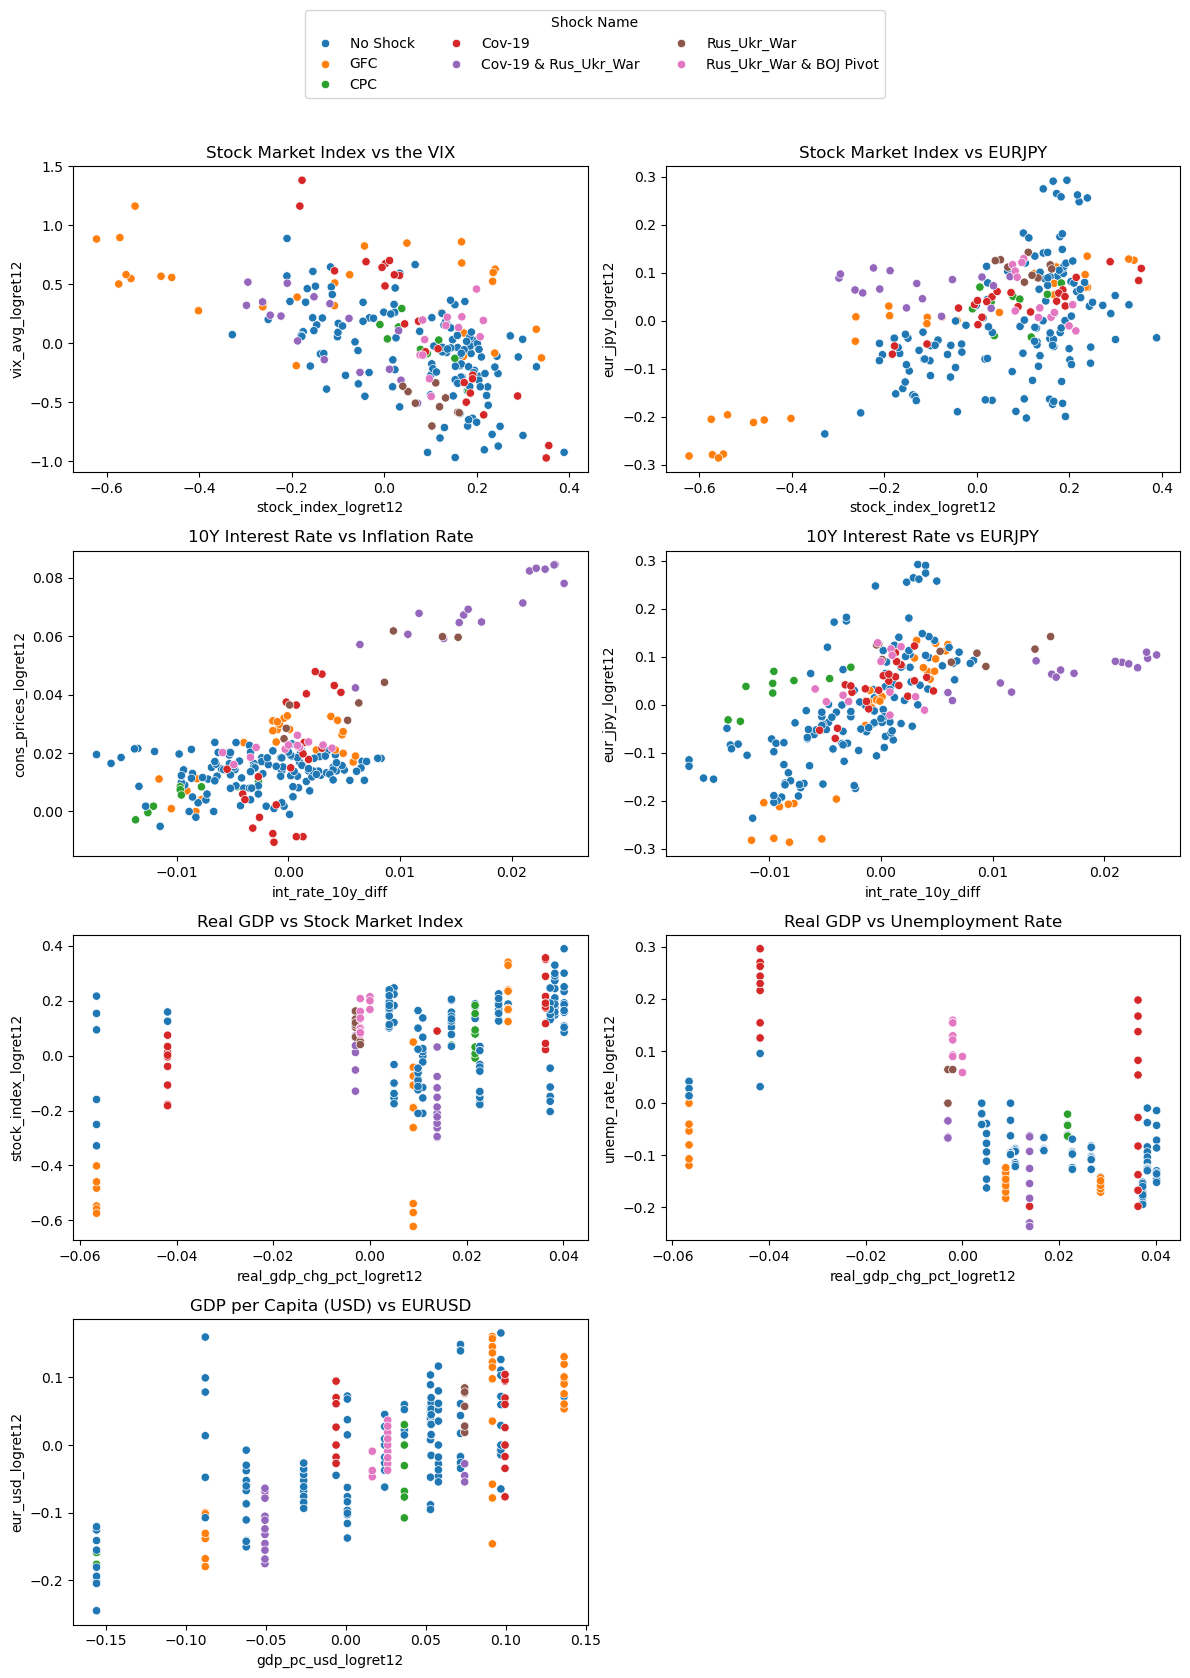

In [1270]:
# Create a grid of 7 subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
plot_kwargs = dict(data=sub_germany_1_copy, hue='shock_name', legend=False)

# Create scatterplots without individual legends
sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', ax=axes[0, 0], **plot_kwargs)
axes[0, 0].set_title('Stock Market Index vs the VIX')

sns.scatterplot(x='stock_index_logret12', y='eur_jpy_logret12', ax=axes[0, 1], **plot_kwargs)
axes[0, 1].set_title('Stock Market Index vs EURJPY')

sns.scatterplot(x='int_rate_10y_diff', y='cons_prices_logret12', ax=axes[1, 0], **plot_kwargs)
axes[1, 0].set_title('10Y Interest Rate vs Inflation Rate')

sns.scatterplot(x='int_rate_10y_diff', y='eur_jpy_logret12', ax=axes[1, 1], **plot_kwargs)
axes[1, 1].set_title('10Y Interest Rate vs EURJPY')

sns.scatterplot(x='real_gdp_chg_pct_logret12', y='stock_index_logret12', ax=axes[2, 0], **plot_kwargs)
axes[2, 0].set_title('Real GDP vs Stock Market Index')

sns.scatterplot(x='real_gdp_chg_pct_logret12', y='unemp_rate_logret12', ax=axes[2, 1], **plot_kwargs)
axes[2, 1].set_title('Real GDP vs Unemployment Rate')

sns.scatterplot(x='gdp_pc_usd_logret12', y='eur_usd_logret12', ax=axes[3, 0], **plot_kwargs)
axes[3, 0].set_title('GDP per Capita (USD) vs EURUSD')

# Turn off empty subplot
axes[3, 1].axis('off')

# Create a dummy plot to extract legend handles and labels
dummy_fig, dummy_ax = plt.subplots()
dummy_plot = sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', hue='shock_name', data=sub_germany_1_copy, ax=dummy_ax)
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)  # Close dummy plot so it doesn't show

# Add single legend to the full grid
fig.legend(handles, labels, title='Shock Name', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save figure as a high-resolution image
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'germany_scat_pre_stat.png'), dpi=300, bbox_inches='tight')

plt.show()

#### Similar results as the United States grid of scatterplots with the categorical exogenous shock variable overlay, in terms of the impact of different shocks on outlier data values. The 10-year interest rate vs inflation scatterplot here is particularly interesting, as the various shocks together would produce a positive correlation linear fit line, while the normal period blue-colored dots (if isolated) would produce a flat zero-to-low correlation linear fit line.  It appears as if German 10-year interest rates spring into action (climb) during crises, but not so during normal periods.

#### Run the shockstack_grid function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the stacked bar histograms grid visualization output, in particular the outlier data values.

✅ Saved to: C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations\germany_hist_pre_stat.png


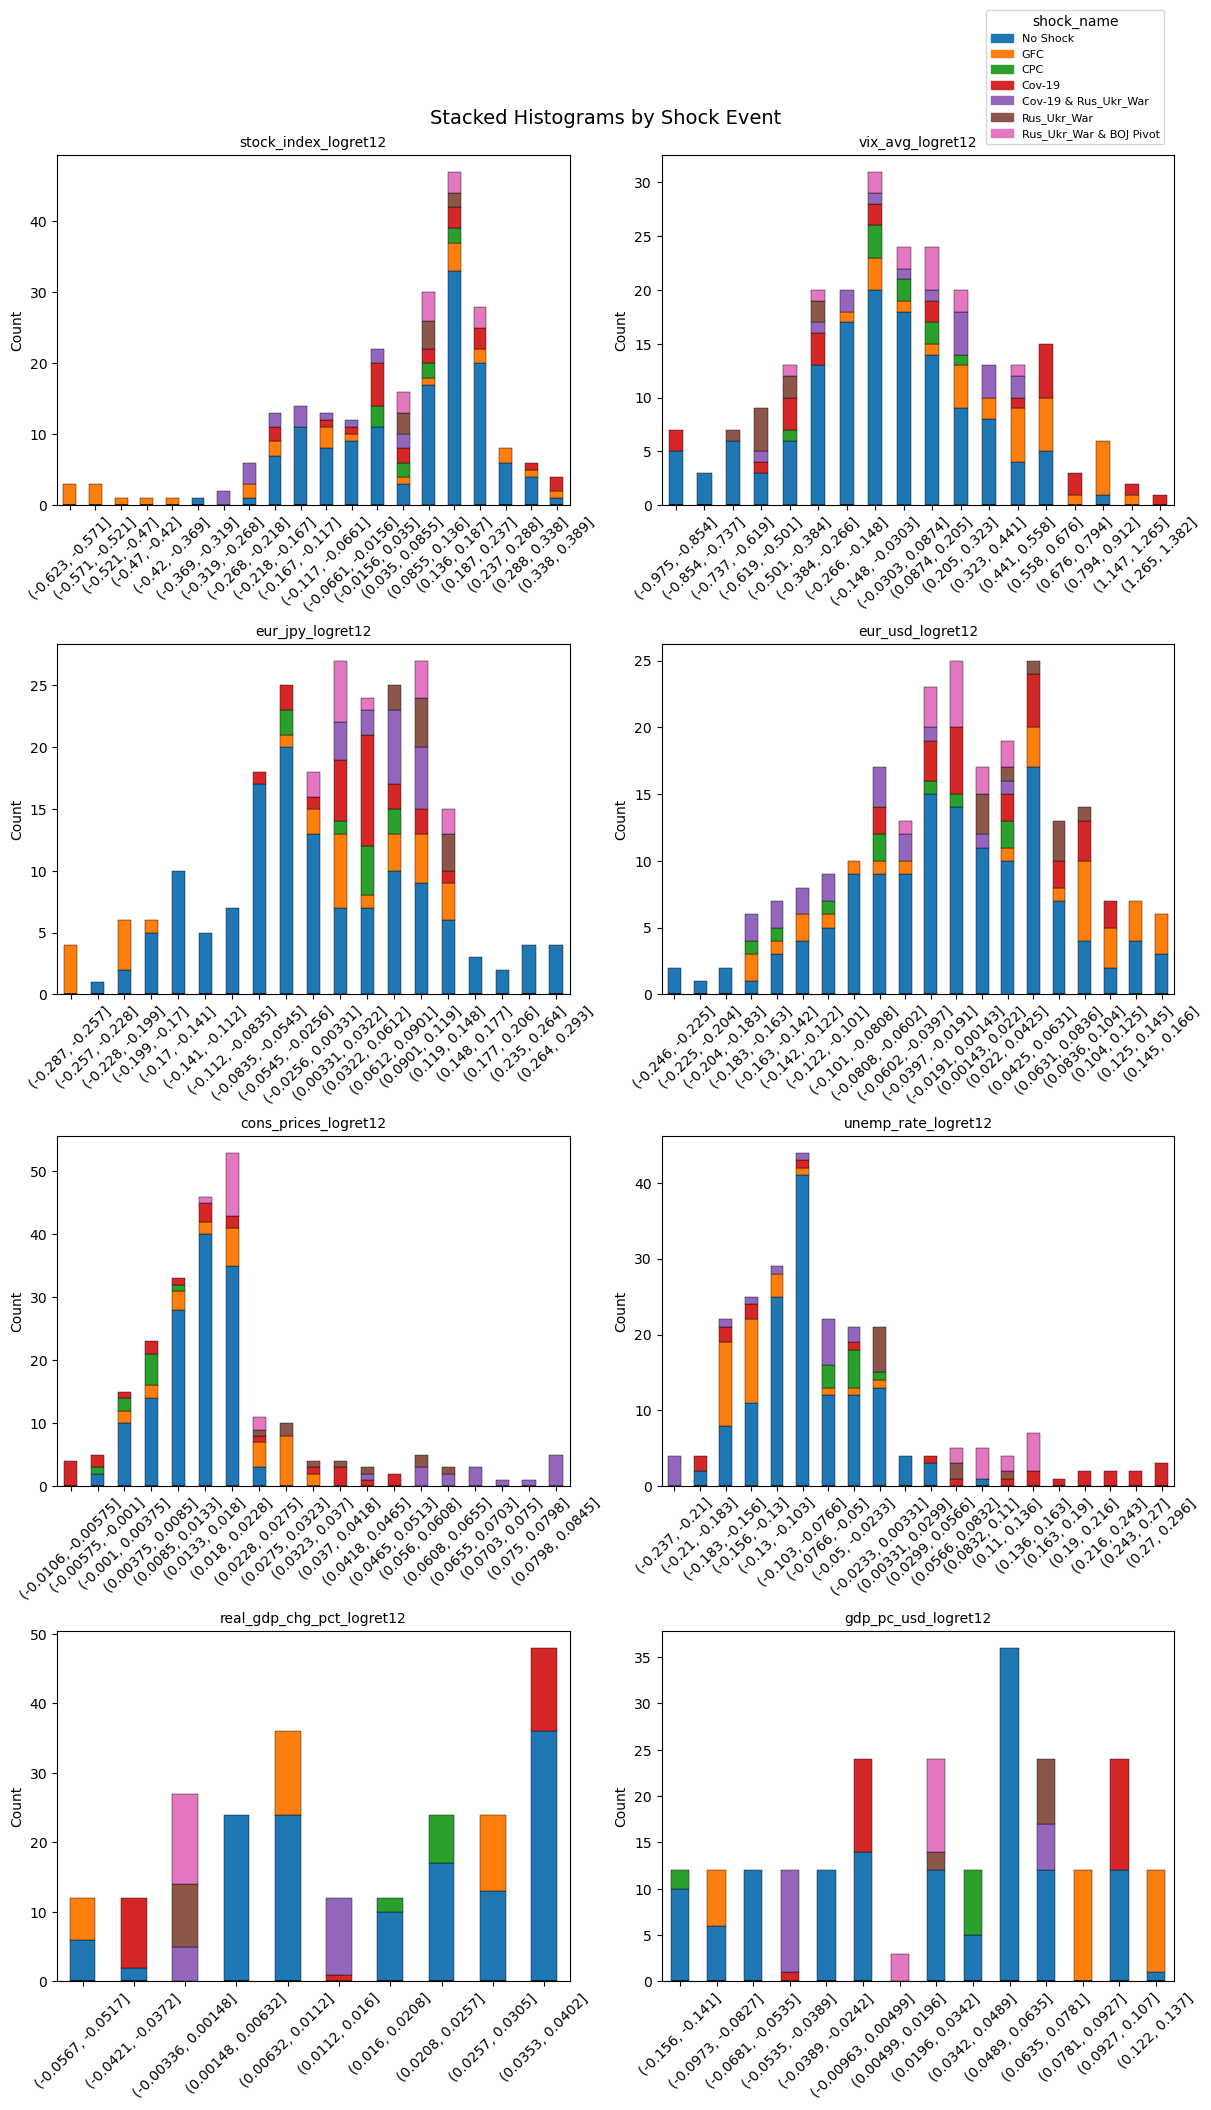

In [1277]:
germany_scat_vars = ['stock_index_logret12', 'vix_avg_logret12', 'eur_jpy_logret12', 'eur_usd_logret12', 'cons_prices_logret12',\
                     'unemp_rate_logret12', 'real_gdp_chg_pct_logret12', 'gdp_pc_usd_logret12']

shockstack_grid(df=sub_germany_1_copy, vars_to_plot=germany_scat_vars, hue='shock_name', bins=20, cols=2, save=True, filename='germany_hist_pre_stat',\
                output_dir=r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations')

#### Germany mostly follows the United States grid of histograms with a few differences.  Some of the tails (EURJPY right tail, EURUSD left tail) happened during normal ("no shock") periods.  Inflation rate increases in Germany were disproportionately impacted by exogenous shocks, and the unemployment rate distribution curve shape is much less steep than the US equivalent, signifying greater standard deviation for the German curve.

In [1280]:
# Export the Germany subset dataframe that was modified for use in categorical plots
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
sub_germany_1_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'germany_cat_pre_stat.pkl'))